# Support Vector Machines with Stochastic Gradient Descent 

* Loading data and exploring dataset:
* We need the following datasets to train and test our model
* We need to load the Breast Cancer Wisconsin Dataset which has 569 instances and 30 features.
* We also need to generate a blob with 1000 instances and 2 features.

In [361]:
import numpy as np
from sklearn.datasets import load_breast_cancer
mainDataset = load_breast_cancer()

In [362]:
X = mainDataset.data
y = mainDataset.target

In [363]:
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [364]:
X.shape

(569, 30)

In [365]:
y.shape

(569,)

In [366]:
from sklearn.datasets import make_blobs
blobX, blob_y = make_blobs(n_samples=1000, centers=2, random_state=0)

In [367]:
blobX.shape

(1000, 2)

In [368]:
blob_y.shape

(1000,)

In [369]:
blob_y[0]

0

* We know need to normalize (standardize) our data and relabel our target to +1/-1
* For normalizing our model, we will be fitting on the training dataset and transforming the training and testing dataset to prevent data leakage.
* For the relabling, we can change all the 0 in y to -1

In [370]:
y[y == 0] = -1
np.unique(y)

array([-1,  1])

In [371]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [372]:
X_train_scaled

array([[-0.52062492, -0.3629934 , -0.46548984, ..., -0.67580898,
        -0.58109609,  0.51919339],
       [ 1.48227672,  0.92918279,  1.45949583, ...,  1.01115676,
        -0.54646457, -0.45710183],
       [-0.33854295, -1.26027307, -0.41516341, ..., -1.27089854,
        -1.35857381, -1.0249867 ],
       ...,
       [-0.53743249, -1.6271296 , -0.56817197, ..., -0.15948582,
         0.37819713, -0.46265844],
       [-0.11444207, -0.47281669, -0.18260664, ..., -1.0271568 ,
        -0.91355872, -0.69047918],
       [ 1.81282552,  2.77748544,  1.73547944, ...,  0.75377045,
        -0.04084432, -0.11481506]])

* We need to add bias to our data in order to accomdate the vector product: W(transpose).X + b

In [373]:
y_train

array([ 1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
       -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1,
       -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,
        1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,
        1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1,
        1, -1, -1,  1, -1

In [374]:
numRows = X_train_scaled.shape[0]
oneColumn = np.ones((numRows,1))
X_train_scaled = np.c_[oneColumn,X_train_scaled]

X_train_scaled

array([[ 1.        , -0.52062492, -0.3629934 , ..., -0.67580898,
        -0.58109609,  0.51919339],
       [ 1.        ,  1.48227672,  0.92918279, ...,  1.01115676,
        -0.54646457, -0.45710183],
       [ 1.        , -0.33854295, -1.26027307, ..., -1.27089854,
        -1.35857381, -1.0249867 ],
       ...,
       [ 1.        , -0.53743249, -1.6271296 , ..., -0.15948582,
         0.37819713, -0.46265844],
       [ 1.        , -0.11444207, -0.47281669, ..., -1.0271568 ,
        -0.91355872, -0.69047918],
       [ 1.        ,  1.81282552,  2.77748544, ...,  0.75377045,
        -0.04084432, -0.11481506]])

In [375]:
X_train_scaled

array([[ 1.        , -0.52062492, -0.3629934 , ..., -0.67580898,
        -0.58109609,  0.51919339],
       [ 1.        ,  1.48227672,  0.92918279, ...,  1.01115676,
        -0.54646457, -0.45710183],
       [ 1.        , -0.33854295, -1.26027307, ..., -1.27089854,
        -1.35857381, -1.0249867 ],
       ...,
       [ 1.        , -0.53743249, -1.6271296 , ..., -0.15948582,
         0.37819713, -0.46265844],
       [ 1.        , -0.11444207, -0.47281669, ..., -1.0271568 ,
        -0.91355872, -0.69047918],
       [ 1.        ,  1.81282552,  2.77748544, ...,  0.75377045,
        -0.04084432, -0.11481506]])

In [376]:
numRows = X_test_scaled.shape[0]
oneColumn = np.ones((numRows,1))
X_test_scaled = np.c_[oneColumn,X_test_scaled]

X_test_scaled

array([[ 1.        ,  0.33656096, -1.7159229 , ...,  1.0142578 ,
         0.56174421,  0.9309377 ],
       [ 1.        , -1.37977168,  0.63242623, ..., -1.42098888,
        -0.79061681, -0.57323484],
       [ 1.        , -0.15926225, -0.7391966 , ..., -0.73519389,
         0.74702286, -0.40209146],
       ...,
       [ 1.        , -0.89039138, -1.05698315, ..., -1.1508883 ,
        -1.71354693, -0.61768767],
       [ 1.        , -0.17326855, -0.84901989, ..., -0.38865268,
        -0.62611707, -1.06388293],
       [ 1.        , -0.38896565,  0.07162644, ..., -0.82869025,
         0.7297071 , -0.38319901]])

* The main concept of the SVM is to come up with the maximum margin to help separare the data points in order to classify them.
* Maximizing the margin which is depicted as 2/||W|| is similar to minimizing ||W||
* Thus, the loss function can be shown as:


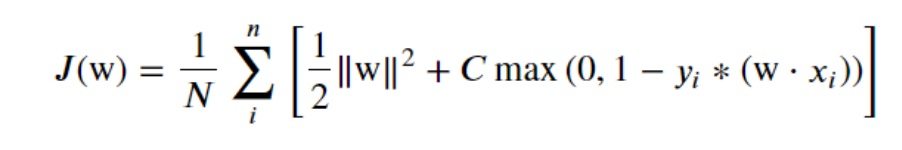

In [377]:
# the tradeoff variable is indicated by C
def svmLossFunction(weight,X,y,C):
    weightTranspose = np.transpose(weights)
    normSquare = np.dot(weightTranspose,weight)
    hingeLoss = 1 - y*np.dot(X,weight)
    for i in range(len(hingeLoss)):
        if hingeLoss[i] <= 0:
            hingeLoss[i] = 0
    return np.mean(0.5*normSquare + C*hingeLoss)

* Now in order to minimize this loss function, we will be using stochastic gradient descent.
* For this, we need to calculate the gradient of the loss function with respect to the weight which can be expressed in the following equation: 

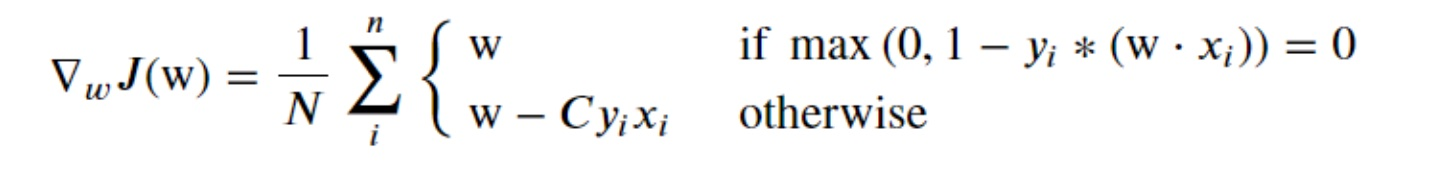

In [378]:
# to compute the gradient of the cost function
# we use xi and yi because in SGD we only take one instance
def svmGradient(weight,C,xi,yi):
#     print(f"X Shape: {xi.shape}")
#     print(f"Weight Shape: {weight.shape}")
    #transpose = np.transpose(weight)
    hingeLoss = 1 - yi*np.dot(xi,weight)
#     print(f"Hinge Shape: {hingeLoss.shape}")
#     print(f"Hinge Loss: {hingeLoss}")
#     print(f"Y Shape: {yi.shape}")
#     print(f"Y: {yi}")
    gradientWeight = np.random.randn(len(weight))
    for i in range(len(hingeLoss)):
        if hingeLoss[i] <= 0:
            temp = weight
        else:
            temp = np.transpose(weight - (C * yi * xi)).reshape(len(weight))
#     print(f"Temp Shape: {temp.shape}")
    gradientWeight += temp
    
    return gradientWeight

* We are now required to use Stochastic Gradient Descent in order to minimize the cost function.
* The concept of Stochastic Gradient Descent is to use a random instance to calculate the gradient instead of the entire dataset.
* The next weight is calculated as weightNew = weightOld - learning rate * gradient

In [379]:
def stochasticGradient(X,y,C,num):
    def learningSchedule(t):
         return 5/(t+50)
        
    n_epochs = num
    m = len(X)
    weight = np.random.randn(X.shape[1]) # choosing a random row from X each time
#     print("hey ",initWeight.shape)
    for epoch in range(n_epochs):
        for i in range(m):
            randomInstance = np.random.randint(m)
            xi = X[randomInstance:randomInstance+1]
            yi = y[randomInstance:randomInstance+1]
            gradient = svmGradient(weight,C,xi,yi)
            eta = learningSchedule(epoch*m + i)
            weight = weight - eta*gradient
    return weight

In [380]:
# getting the weights for the training dataset
trainWeight = stochasticGradient(X_train_scaled, y_train,0.1,50)

In [381]:
# getting the weights for the test dataset
testWeight = stochasticGradient(X_test_scaled, y_test,0.1,50)

In [382]:
# computing the closest training points
# the closest point is the one with the minimum absolute value of w.x

def findClosestPoints(X,weight):
    distance = np.dot(X,weight)
    #print(distance[:5])
    absDistance = np.absolute(distance)
    absDistance = np.sort(absDistance)
    print(f"The first five closest points have the following distances from the margin:\n {absDistance[:5]}")
    return absDistance

closestPoints = findClosestPoints(X_train_scaled,trainWeight)

The first five closest points have the following distances from the margin:
 [0.01437983 0.01570402 0.0201058  0.02023367 0.02760742]


In [383]:
# The minimum distance from the margin is 
print(f"The minimum distance from the margin is {closestPoints[0]}")

The minimum distance from the margin is 0.014379831779109363


* The decision function is the dot product of the weight with X as this is reflective of the following equation

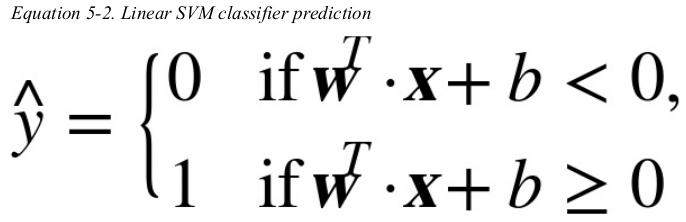

# Testing The Model

* We need to find Accuracy Precision Recall F1 Score and Confusion Matrix
* For this we need to compare the predicted y values (by first classifying them into either 0 (negative) or 1 (positive) or -1 (negative) )to the actual y values
* Precision = true positive / (true positive + false positive)
* Recall = true positive / (true positive + false negative)
* F1 = 2*(precision*recall) / (precision + recall)
* Accuracy = correct predictions / total number of predictions

In [384]:
#function for testing 
import matplotlib.pyplot as plt
from sklearn import metrics

def testing(yPredicted,y):
    truePositive = 0
    trueNegative = 0
    falsePositive = 0
    falseNegative = 0

    for i in range(y.size):
        if y[i] == -1 and yPredicted[i] == -1:
            trueNegative += 1
        elif y[i] == 1 and yPredicted[i] == 1:
            truePositive += 1
        elif y[i] == 1 and yPredicted[i] != 1:
            falsePositive += 1
        else:
            falseNegative += 1

    precision = truePositive / (truePositive + falsePositive)
    recall = truePositive / (truePositive + falseNegative)
    f1 = 2 * (precision*recall)/(precision+recall)    
    accuracy = (truePositive+trueNegative) / y.size

    print("The metrics are as follows: ")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1: {f1}")
    print(f"Accuracy: {accuracy}")
    
    

    cMatrix = metrics.confusion_matrix(y, yPredicted)
    
    cMatrixPlot = metrics.ConfusionMatrixDisplay(confusion_matrix=cMatrix)
    cMatrixPlot.plot()
    plt.show()
    

In [385]:
yTestPredictions = np.sign(np.dot(X_test_scaled, trainWeight))

yTestPredictions.shape

(171,)

In [386]:
y_test.shape

(171,)

The metrics are as follows: 
Precision: 0.9642857142857143
Recall: 0.9557522123893806
F1: 0.96
Accuracy: 0.9473684210526315


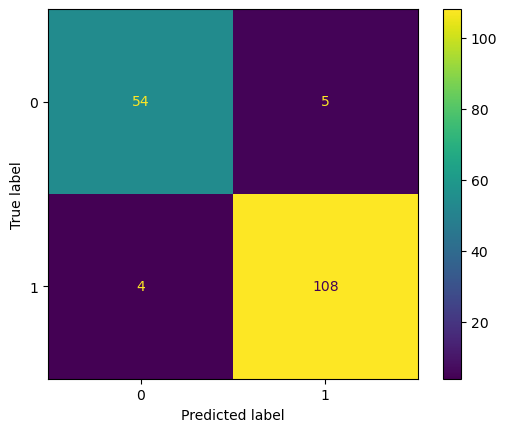

In [387]:
testing(yTestPredictions, y_test)

In [388]:
np.unique(blob_y)

array([0, 1])

In [389]:
# Testing on blob data now

blob_y[blob_y == 0] = -1

blob_X_train, blob_X_test, blob_y_train, blob_y_test = train_test_split(blobX, blob_y, test_size=0.3, random_state=10)
scaler = StandardScaler()
blob_X_train_scaled = scaler.fit_transform(blob_X_train)
blob_X_test_scaled = scaler.transform(blob_X_test)

In [390]:
blob_X_train_scaled.shape

(700, 2)

In [391]:
numBlobRowsTrain = blob_X_train_scaled.shape[0]
oneColumnTrain = np.ones((numBlobRowsTrain,1))
numBlobRowsTest = blob_X_test_scaled.shape[0]
oneColumnTest = np.ones((numBlobRowsTest,1))
blob_X_train_scaled = np.c_[oneColumnTrain,blob_X_train_scaled]
blob_X_test_scaled = np.c_[oneColumnTest,blob_X_test_scaled]

blobTestWeights = stochasticGradient(blob_X_train_scaled, blob_y_train,0.1,50)

In [392]:
blob_X_train_scaled.shape

(700, 3)

In [393]:
blobTestWeights

array([-0.00274897,  0.05815713, -0.09204073])

In [394]:
blobYPredicted = np.sign(np.dot(blob_X_test_scaled, blobTestWeights))
blobYPredicted

array([ 1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,
        1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,
       -1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,
       -1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
       -1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,
        1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,
        1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,
       -1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,
        1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1.,
        1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,
        1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.,
       -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1

The metrics are as follows: 
Precision: 0.9
Recall: 0.9440559440559441
F1: 0.9215017064846417
Accuracy: 0.9233333333333333


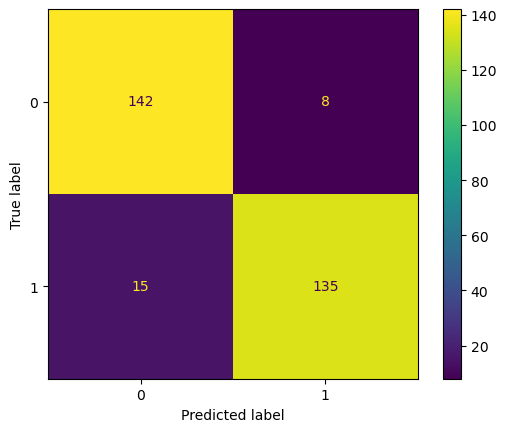

In [395]:
testing(blobYPredicted, blob_y_test)

The metrics are as follows: 
Precision: 0.9553571428571429
Recall: 0.9469026548672567
F1: 0.9511111111111111
Accuracy: 0.935672514619883


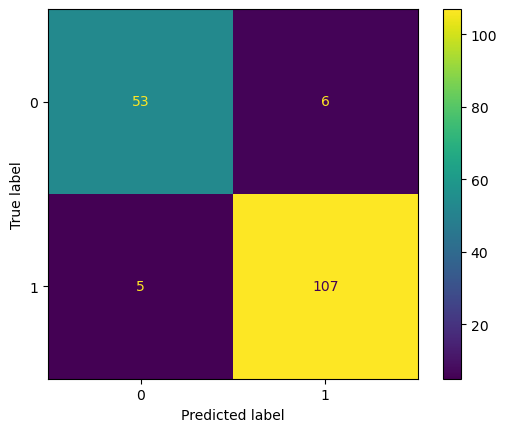

In [396]:
#trying with different hyperparameters 
testWeight2 = stochasticGradient(X_train_scaled, y_train, 0.01, 100)
yPredicted2 = np.sign(np.dot(X_test_scaled,testWeight2))
testing(yPredicted2,y_test)

The metrics are as follows: 
Precision: 0.9732142857142857
Recall: 0.990909090909091
F1: 0.9819819819819819
Accuracy: 0.9766081871345029


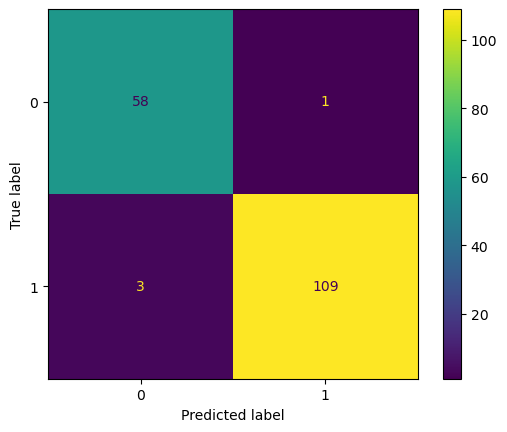

In [397]:
weight3 = stochasticGradient(X_train_scaled, y_train, 1, 100)
yPredicted3 = np.sign(np.dot(X_test_scaled,weight3))
testing(yPredicted3,y_test)

In [398]:
# training with different splits of the data

shuffledData = np.concatenate((X_train_scaled,X_test_scaled))
shuffledData.shape

(569, 31)

In [399]:
shuffledTarget = np.concatenate((y_train,y_test))
shuffledTarget.shape

(569,)

In [400]:
#using kfold to split data differently
from sklearn.model_selection import KFold
def kFoldCrossValidation(X,y):
    kf = KFold(n_splits = 10)
    
    
    
    for i, (train_index, test_index) in enumerate(kf.split(X,y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        weights = stochasticGradient(X_train,y_train,0.1,50)
        
        yTestPredicted = np.sign(np.dot(X_test,weights))
        
        print(f"Fold {i+1}")
        testing(yTestPredicted,y_test)
       

Fold 1
The metrics are as follows: 
Precision: 0.9459459459459459
Recall: 0.9459459459459459
F1: 0.9459459459459459
Accuracy: 0.9298245614035088


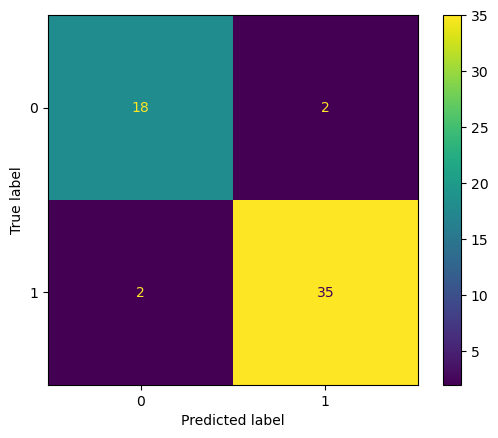

Fold 2
The metrics are as follows: 
Precision: 0.9705882352941176
Recall: 0.9705882352941176
F1: 0.9705882352941176
Accuracy: 0.9649122807017544


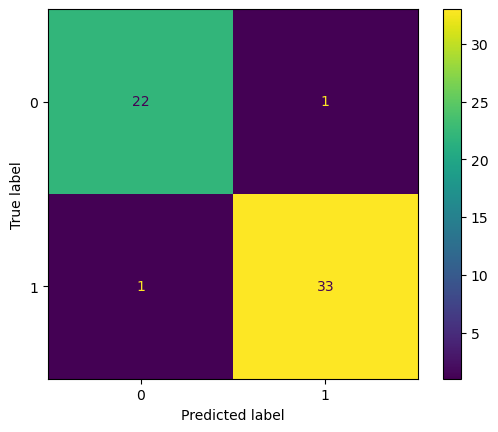

Fold 3
The metrics are as follows: 
Precision: 0.9772727272727273
Recall: 0.9772727272727273
F1: 0.9772727272727273
Accuracy: 0.9649122807017544


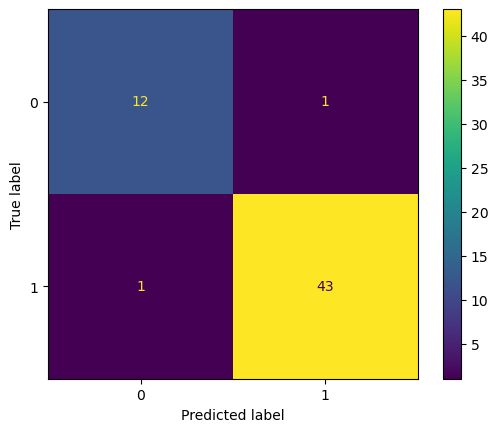

Fold 4
The metrics are as follows: 
Precision: 1.0
Recall: 0.8387096774193549
F1: 0.9122807017543859
Accuracy: 0.9122807017543859


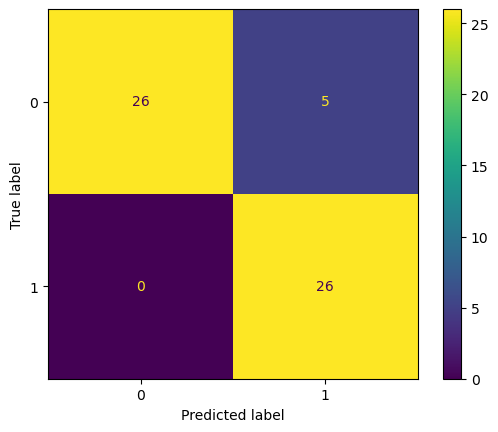

Fold 5
The metrics are as follows: 
Precision: 0.9714285714285714
Recall: 0.918918918918919
F1: 0.9444444444444445
Accuracy: 0.9298245614035088


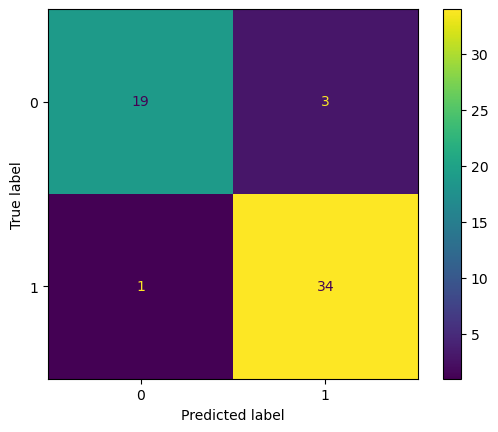

Fold 6
The metrics are as follows: 
Precision: 0.8529411764705882
Recall: 1.0
F1: 0.9206349206349206
Accuracy: 0.9122807017543859


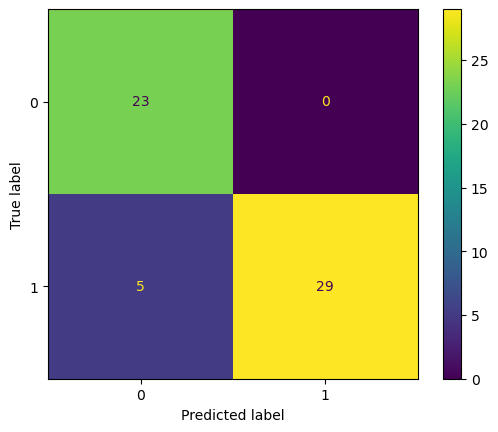

Fold 7
The metrics are as follows: 
Precision: 0.9714285714285714
Recall: 0.8717948717948718
F1: 0.9189189189189189
Accuracy: 0.8947368421052632


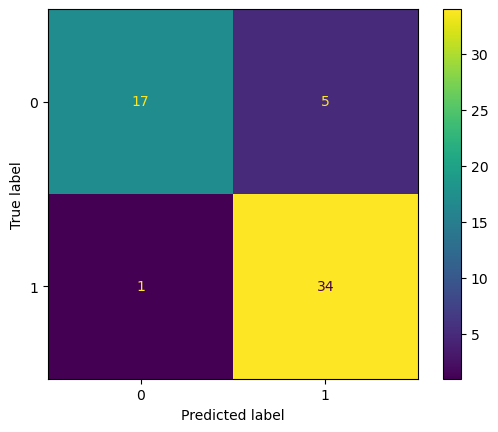

Fold 8
The metrics are as follows: 
Precision: 0.9459459459459459
Recall: 1.0
F1: 0.9722222222222222
Accuracy: 0.9649122807017544


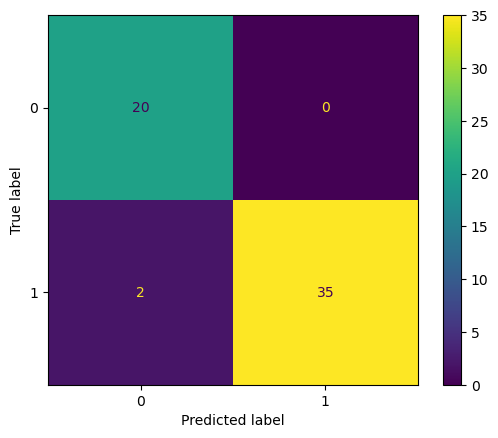

Fold 9
The metrics are as follows: 
Precision: 1.0
Recall: 0.95
F1: 0.9743589743589743
Accuracy: 0.9649122807017544


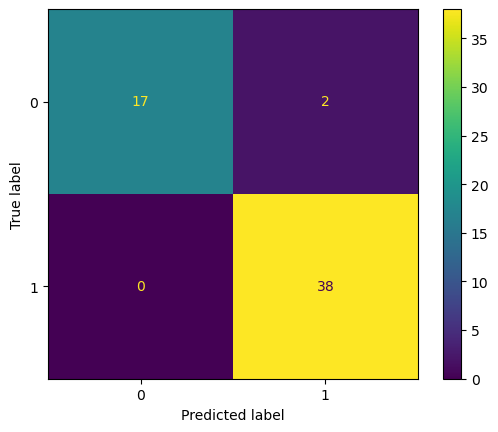

Fold 10
The metrics are as follows: 
Precision: 0.9459459459459459
Recall: 0.9459459459459459
F1: 0.9459459459459459
Accuracy: 0.9285714285714286


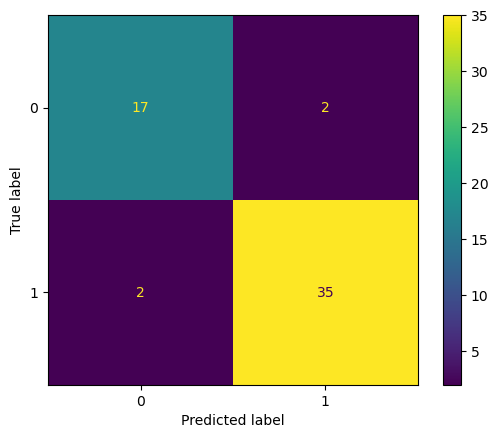

In [401]:
kFoldCrossValidation(shuffledData,shuffledTarget)